# Linear Regression & Machine Learning(Train_test_split)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
myanalysis=pd.read_excel("House_Price_Kaggle.xlsx")

In [3]:
myanalysis.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900
1,3,2.25,2570,7242,2.0,538000
2,2,1.00,770,10000,1.0,180000
3,4,3.00,1960,5000,1.0,604000
4,3,2.00,1680,8080,1.0,510000


In [4]:
i=myanalysis.head(50)

In [5]:
#EDA
myanalysis.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,2.161300e+04
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,5.400881e+05
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,3.671272e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,7.500000e+04
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.219500e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,7.700000e+06


In [6]:
myanalysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     21613 non-null  int64  
 1   bathrooms    21613 non-null  float64
 2   sqft_living  21613 non-null  int64  
 3   sqft_lot     21613 non-null  int64  
 4   floors       21613 non-null  float64
 5   price        21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


In [7]:
myanalysis.isnull().sum()

bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
price          0
dtype: int64

In [8]:
#Correlation

In [9]:
mycorr=myanalysis.corr()

In [10]:
mycorr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,0.308350
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.525138
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.702035
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.089661
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.256794
price,0.308350,0.525138,0.702035,0.089661,0.256794,1.000000


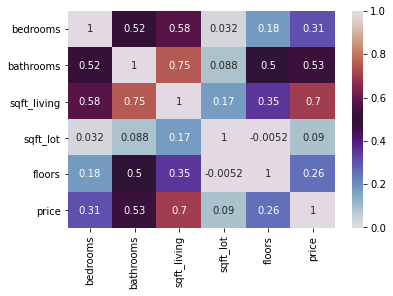

In [11]:
sb.heatmap(mycorr,annot=True,cmap="twilight")

In [12]:
#Graphs

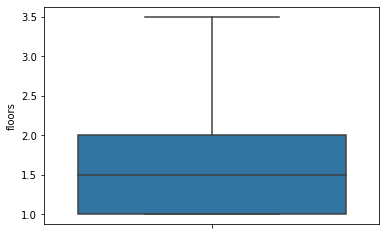

In [13]:
sb.boxplot(y=myanalysis["floors"])

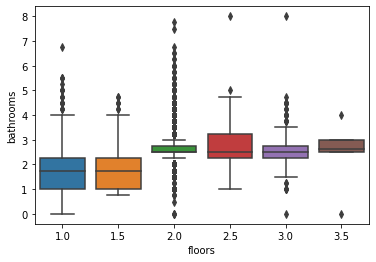

In [14]:
#box plot
sb.boxplot(x="floors",y="bathrooms",data=myanalysis);

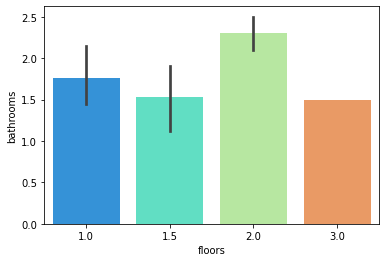

In [15]:
# choosing different color range - barplot
sb.barplot(x='floors',y='bathrooms',data=i,palette= 'rainbow',)


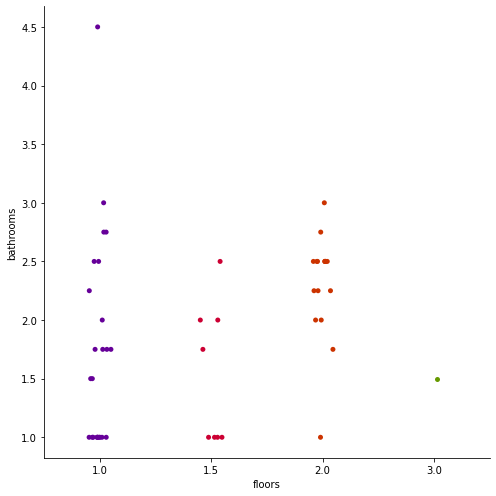

In [16]:
# categorical plot
c=sb.catplot(x='floors',y='bathrooms',data=i,height=7,palette='brg')

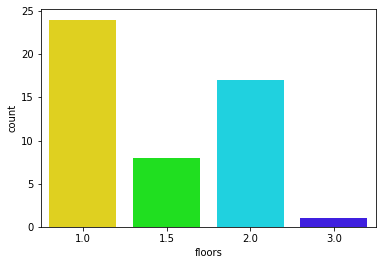

In [17]:
#countplot
k=sb.countplot(x='floors',data=i ,palette='gist_rainbow')

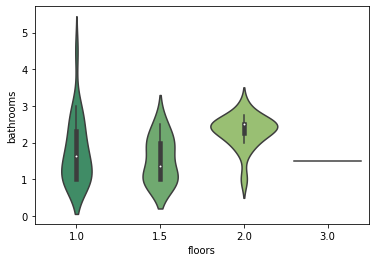

In [18]:
#scatterplot
sb.violinplot(x='floors',y='bathrooms',data=i,palette='summer')

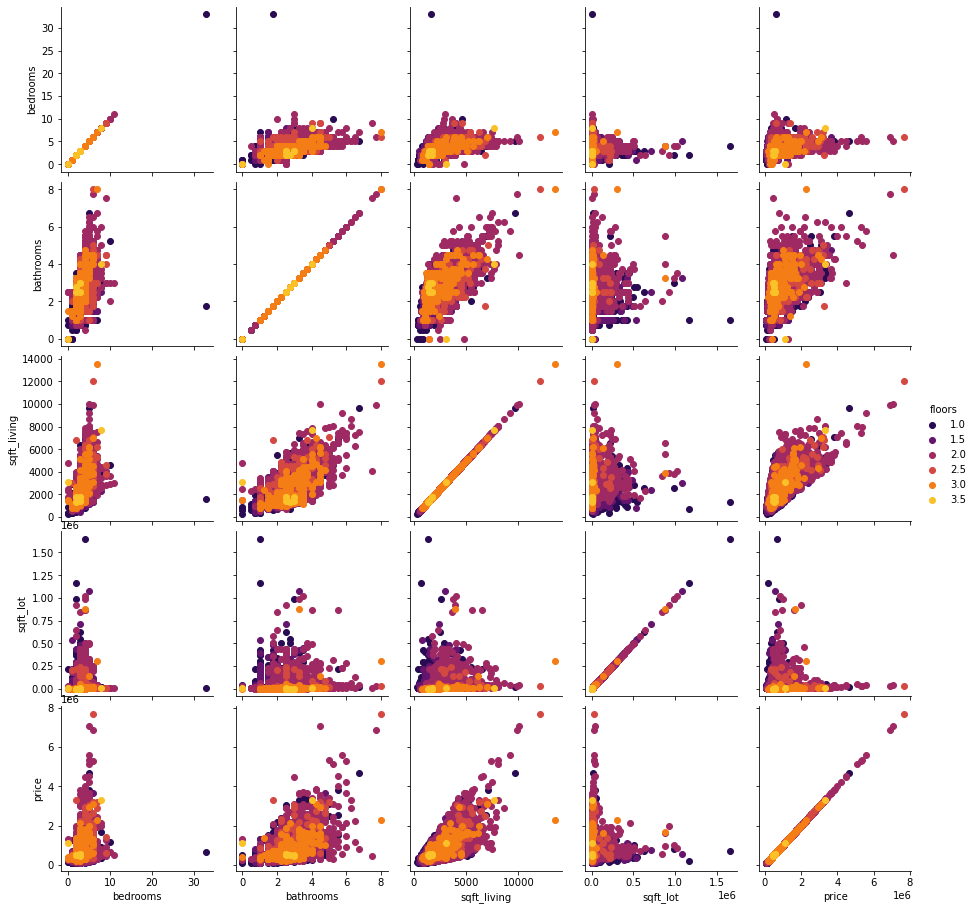

In [19]:
x=sb.PairGrid(myanalysis,hue="floors",palette="inferno")
x=x.map(plt.scatter)
x=x.add_legend()

In [20]:
#Splitting of x_ind & y_dep

In [21]:
ydep=myanalysis.price
ydep

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64

In [22]:
xind=myanalysis.drop("price",axis=1)
xind

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,3,1.00,1180,5650,1.0
1,3,2.25,2570,7242,2.0
2,2,1.00,770,10000,1.0
3,4,3.00,1960,5000,1.0
4,3,2.00,1680,8080,1.0
...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0
21609,4,2.50,2310,5813,2.0
21610,2,0.75,1020,1350,2.0
21611,3,2.50,1600,2388,2.0


# Machine Learning(Train_test_split)

In [23]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [24]:
x_train,x_test,y_train,y_test=train_test_split(xind,ydep,train_size=0.8,random_state=2)

In [25]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
15166,4,4.00,3860,67953,2.0
13416,4,2.00,1920,7803,1.0
206,3,2.50,2440,4587,2.0
4286,3,2.75,1910,15508,1.0
18065,4,2.50,2130,9100,1.0
...,...,...,...,...,...
1099,2,1.00,720,4222,1.0
18898,4,2.50,1820,9161,1.0
11798,4,3.25,3440,7661,2.0
6637,2,1.50,870,747,2.0


In [26]:
#Checking p_value and R_squared

In [27]:
c=sm.OLS(y_train,x_train)
res=c.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.844
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                          1.867e+04
Date:                Wed, 02 Dec 2020   Prob (F-statistic):                        0.00
Time:                        11:38:26   Log-Likelihood:                     -2.3995e+05
No. Observations:               17290   AIC:                                  4.799e+05
Df Residuals:                   17285   BIC:                                  4.799e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -4.314e+04   1999.873    -21.570      0.000   -4.71e+04   -3.92e+04
bathrooms    1.099e+04   4251.788      2.586      0.010    2661.018    1.93e+04
sqft_living   309.0313      3.485     88.670      0.000     302.200     315.863
sqft_lot       -0.3495      0.051     -6.904      0.000      -0.449      -0.250
floors       1.443e+04   3805.775      3.792      0.000    6971.138    2.19e+04
==============================================================================
Omnibus:                    11366.122   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           403536.057
Skew:                           2.654   Prob(JB):                         0.00
Kurtosis:                      26.064   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model=LinearRegression()

In [29]:
model.fit(x_train,y_train)

LinearRegression()

In [30]:
pred=model.predict(x_test)

In [31]:
pred.round()

array([612746., 587552., 420940., ..., 686327., 223282., 426574.])

In [32]:
df=pd.DataFrame({"Actual":y_test,"Prediction":pred})
df

,Actual,Prediction
6638,735000,6.127458e+05
7366,1150000,5.875517e+05
3158,350500,4.209404e+05
9117,860000,1.213449e+06
3392,122000,2.359337e+05
...,...,...
8494,338000,3.327913e+05
5359,263000,4.072540e+05
5242,397450,6.863269e+05
13777,375000,2.232821e+05


In [33]:
df1=df.head(50)

C:\Users\jack1\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\style.py:60: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  [conv.to_rgba(c) for c in colors]


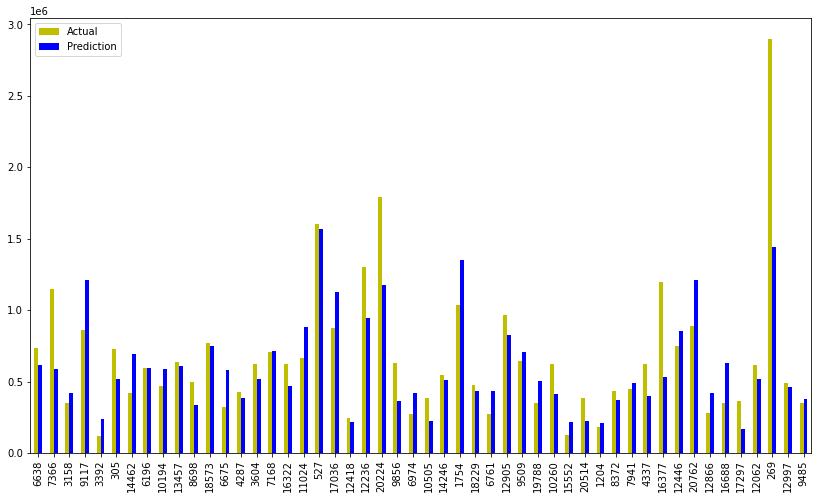

In [34]:
df1.plot(kind="bar",figsize=(14,8),color="yB");

In [40]:
y_test.shape

(4323,)

In [41]:
df2=pd.DataFrame({"x":range(0,4323),"Actual":y_test,"Prediction":pred})
df2

,x,Actual,Prediction
6638,0,735000,6.127458e+05
7366,1,1150000,5.875517e+05
3158,2,350500,4.209404e+05
9117,3,860000,1.213449e+06
3392,4,122000,2.359337e+05
...,...,...,...
8494,4318,338000,3.327913e+05
5359,4319,263000,4.072540e+05
5242,4320,397450,6.863269e+05
13777,4321,375000,2.232821e+05


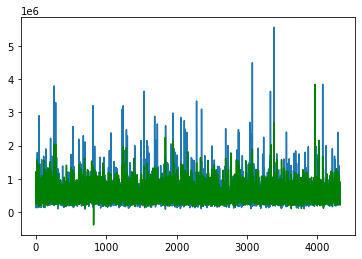

In [43]:
x=plt.plot("x","Actual",data=df2)
plt.plot("x","Prediction",data=df2,color="green")